In [1]:
from simulation import run_simulation

In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
"""
Average Waiting Time
Average Queue Length
Average Serving Time
Average Number of servers idle
Average number of arrivals (lambda)
"""

In [33]:
from simulation import get_statistics_distribution

In [186]:
verbose = False
time_limit = 720
arrival_lambda = 3
bus_seats = 38
bus_stops = 25
results = get_statistics_distribution(
        arrival_lambda = arrival_lambda,
        bus_seats = bus_seats,
        bus_stops = bus_stops,
        time_limit = time_limit,
        verbose = verbose,
        runs = 1000
        )

 24%|██▍       | 241/1000 [01:23<04:25,  2.86it/s]/Users/samaypanwar/.local/share/virtualenvs/MH4702-QueueingSystem-GrJsyk8W/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:94: RuntimeWarning: overflow encountered in _binom_ppf
  return _boost._binom_ppf(q, n, p)
100%|██████████| 1000/1000 [05:45<00:00,  2.90it/s]


Text(0, 0.5, 'Count')

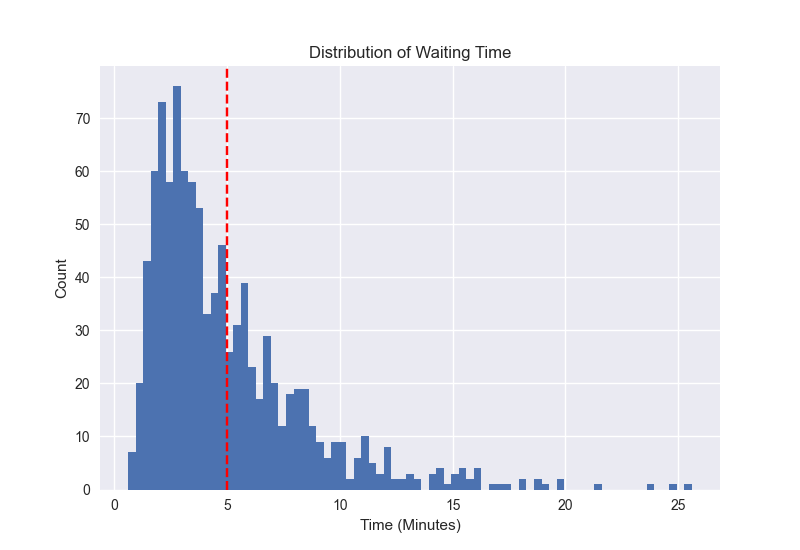

In [210]:
import matplotlib.pyplot as plt
ax = plt.subplots()
plt.title('Distribution of Waiting Time')
plt.hist(results.W, bins = 75);
plt.axvline(results.W.mean(), color = 'red', ls = "--")
plt.xlabel('Time (Minutes)')
plt.ylabel('Count')

In [213]:
results.mean()

W     4.995925
L    15.617671
S    12.493058
dtype: float64

In [216]:
results.W.mean() * 3

14.987773611320332

In [6]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")

/var/folders/t6/2vvjnfk10mx932fmzp_hb4wr0000gn/T/ipykernel_24574/1066817276.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [83]:
from utils.inverse_transform_sampling import generate_exponential, generate_binomial

ModuleNotFoundError: No module named 'utils.inverse_transform_sampling'; 'utils' is not a package

In [45]:
k = []
for i in range(10000):
    k.append(generate_binomial(n = 30))

<AxesSubplot: ylabel='Frequency'>

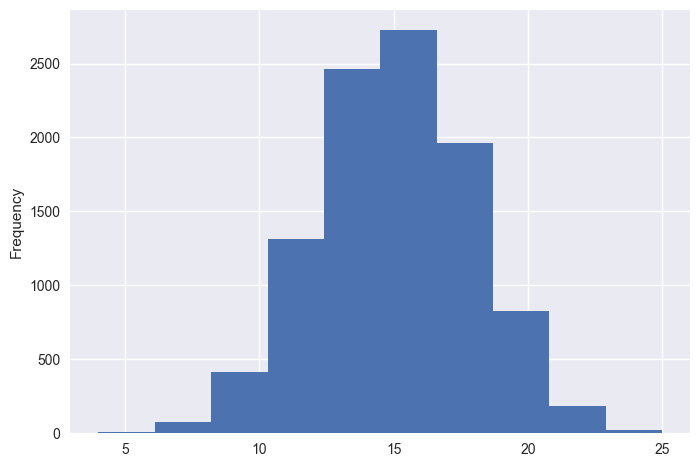

In [46]:
import pandas as pd
pd.Series(k).plot(kind = 'hist')

15.0112

In [248]:
import numpy as np
verbose = False
time_limit = 720
arrival_lambda = 3
bus_seats = 38
bus_stops = 25
%load_ext autoreload
%autoreload 2
# arrival_lambda = np.linspace(2, 6, 100)
bus_seats = [i for i in range(25, 55, 1)]
# bus_stops =


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
bus_stops

25

In [250]:
sims = {
        'W': [],
        'L': [],
        'S': [],
        # 'lmbda': [],
        'seat': []
        }
from tqdm.notebook import tqdm
# for lmbda in tqdm(arrival_lambda):
for seat in bus_seats:

        results = dict(get_statistics_distribution(
                arrival_lambda = arrival_lambda,
                bus_seats = seat,
                bus_stops = bus_stops,
                time_limit = time_limit,
                verbose = verbose,
                runs = 10,
                # counter = False
                ).mean())

        sims['W'].append(results['W'])
        sims['L'].append(results['L'])
        sims['S'].append(results['S'])
        # sims['lmbda'].append(lmbda)
        sims['seat'].append(seat)

 20%|██        | 2/10 [00:00<00:02,  3.08it/s]/Users/samaypanwar/.local/share/virtualenvs/MH4702-QueueingSystem-GrJsyk8W/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:94: RuntimeWarning: overflow encountered in _binom_ppf
  return _boost._binom_ppf(q, n, p)
100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


In [252]:
x = pd.DataFrame(data = sims)

# x.diff()
x

,W,L,S,seat
0,116.106482,353.774970,12.475571,25
1,104.277547,325.801290,12.478281,26
2,96.281299,295.164829,12.511343,27
3,88.818645,276.379593,12.518601,28
4,75.814123,232.406786,12.482256,29
5,72.052978,223.281126,12.478038,30
6,62.903167,196.310068,12.516767,31
7,50.287658,154.672587,12.479610,32
8,43.542439,134.900132,12.462692,33
9,31.116519,95.566452,12.512583,34


In [253]:
x['Sensitivity_W'] = (x.diff().W / x.diff().seat)
x['Sensitivity_L'] = (x.diff().L / x.diff().seat)

In [254]:
x

,W,L,S,seat,Sensitivity_W,Sensitivity_L
0,116.106482,353.774970,12.475571,25,NaN,NaN
1,104.277547,325.801290,12.478281,26,-11.828935,-27.973680
2,96.281299,295.164829,12.511343,27,-7.996248,-30.636461
3,88.818645,276.379593,12.518601,28,-7.462654,-18.785237
4,75.814123,232.406786,12.482256,29,-13.004522,-43.972807
5,72.052978,223.281126,12.478038,30,-3.761145,-9.125660
6,62.903167,196.310068,12.516767,31,-9.149811,-26.971058
7,50.287658,154.672587,12.479610,32,-12.615509,-41.637481
8,43.542439,134.900132,12.462692,33,-6.745219,-19.772455
9,31.116519,95.566452,12.512583,34,-12.425920,-39.333680


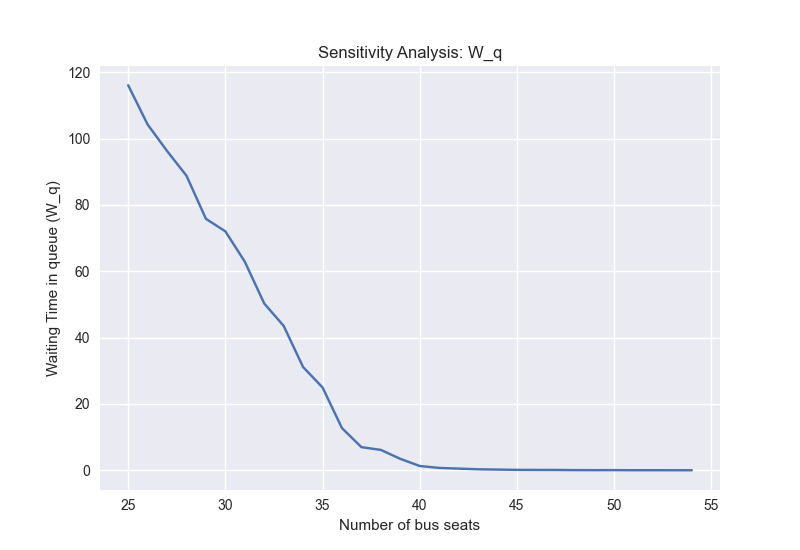

In [260]:
x.to_csv("data/sensitivity_data_seat.csv")

fig, ax = plt.subplots()
plt.plot(x.seat, x.W)
ax.set_title('Sensitivity Analysis: W_q')

ax.set_xlabel('Number of bus seats')
ax.set_ylabel('Waiting Time in queue (W_q)')
# ax.set_zlabel('')
plt.show()

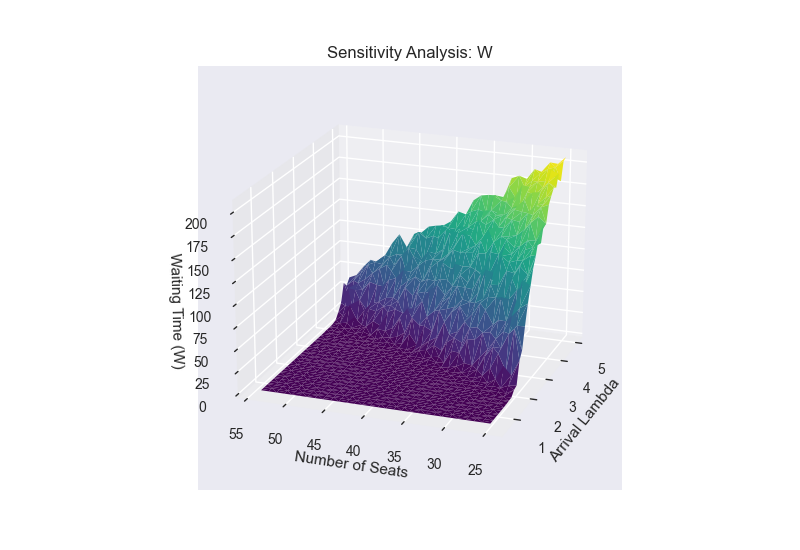

In [185]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x.lmbda, x.seat, x.W,
                cmap='viridis', edgecolor='none');

ax.set_title('Sensitivity Analysis: W');

ax.set_xlabel('Arrival Lambda')
ax.set_ylabel('Number of Seats')
ax.set_zlabel('Waiting Time (W)');

ax.view_init(20, 200, 0)

In [137]:
x

,W,L,S,lmbda,bus_stop
